# Import software libraries

In [2]:
# Import required libraries.
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, \
                            explained_variance_score, \
                            mean_absolute_error, \
                            mean_squared_error
from sklearn.dummy import DummyRegressor
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBRegressor
import pickle                                               # Save Python objects as binary files.
from collections import Counter
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- XGBoost {}'.format(xgboost.__version__))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.19.2
- pandas 1.1.3
- Matplotlib 3.3.2
- Seaborn 0.11.0
- scikit-learn 0.23.2
- XGBoost 1.3.3


# Read and examine the data

In [3]:
# Read the data.
customer_data = pd.read_pickle('data/customer_data.pickle')


# Preview the first five rows of the data.

customer_data.head()

,frequency,recency,tenure,monetary_value,number_unique_items,churned
u12747,6.0,367.0,369.0,39.19,3,True
u12748,41.0,365.0,369.0,12.01,9,False
u12749,2.0,127.0,130.0,22.28,2,True
u1282,0.0,0.0,326.0,0.00,1,False
u12822,0.0,0.0,87.0,0.00,1,True


In [4]:
# Check the structure of the data.

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2130 entries, u12747 to u18283
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   frequency            2130 non-null   float64
 1   recency              2130 non-null   float64
 2   tenure               2130 non-null   float64
 3   monetary_value       2130 non-null   float64
 4   number_unique_items  2130 non-null   int64  
 5   churned              2130 non-null   bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 101.9+ KB


# Prepare the data

In [8]:
# Define the target variable and get the count of each value in the variable.
customer_data.monetary_value.describe()




count    2130.000000
mean       12.423202
std        16.514363
min         0.000000
25%         0.000000
50%         4.250000
75%        20.800000
max       234.300000
Name: monetary_value, dtype: float64

<AxesSubplot:>

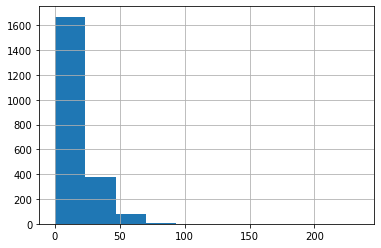

In [11]:
# Plot a histogram of the target variable distribution.
customer_data.monetary_value.hist()



In [12]:
# Split the data into target and features.
target = customer_data.monetary_value
features = customer_data.drop(['monetary_value'],axis=1)

In [14]:
# Split the dataset into separate training and testing sets.

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3)




# Get the shape of both the training dataset and the test dataset.

X_train.shape,X_test.shape,y_train.shape,y_test.shape







((1491, 5), (639, 5), (1491,), (639,))

In [15]:
# Get summary statistics for the target variable (test data).
# Count, mean, standard deviation, minimum, maximum, etc.

y_test.describe()

count    639.000000
mean      12.277527
std       15.245781
min        0.000000
25%        0.000000
50%        4.980000
75%       20.925000
max       82.900000
Name: monetary_value, dtype: float64

# Train a linear regression model

In [17]:
# Standardize the training data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


# Standardize the test data as well.
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
# Create a LinearRegression() model and fit it on the scaled training data.
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)


LinearRegression()

In [19]:
# Make predictions on the test data.
linreg_y_pred = linreg.predict(X_test_scaled)


# Get the first 5 predicted values.
linreg_y_pred[:5]


array([18.07830101, 10.19627528,  1.94373021,  2.65967734,  1.64438665])

# Perform a quick evaluation of the linear regression model

In [20]:
# Obtain the model's R2 score.
r2_score(y_test,linreg_y_pred)


0.4136313484622708

# Train a random forest model

In [21]:
# Create a RandomForestRegressor() model and fit it on the scaled training data.
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train_scaled,y_train)


RandomForestRegressor()

In [22]:
# Make predictions on the test data.
reg_rf_y_pred = reg_rf.predict(X_test)


# Get the first 5 predicted values.
reg_rf_y_pred[:5]


array([24.5778, 24.5778, 28.2169, 29.1518, 28.2169])

# Perform a quick evaluation of the random forest model

In [23]:
# Obtain the model's R2 score.
r2_score(y_test,reg_rf_y_pred)


-1.2307989051155253

# Compare evaluation metrics for each model

In [24]:
# List will hold model objects.

models = []

# Dummy Classifier used as a baseline algorithm.

models.append(('Dummy Regressor', DummyRegressor()))

# Linear Regression model.

models.append(('Linear Regression', LinearRegression()))

# Random Forest model.

models.append(('Random Forest', RandomForestRegressor()))

# XGBoost model.

models.append(('XGBoost', XGBRegressor(objective = 'reg:squarederror', n_jobs = 1)))

In [26]:
# List will hold dictionaries of model scores.

scoring_df = []

# Train each model in the list and output multiple scores for each model.

for name, model in models:
    if name in ['Linear Regression']:
        X_train_1 = X_train_scaled
    else:
        X_train_1 = X_train
    
    model.fit(X_train_1, y_train)
    y_pred = model.predict(X_test)

    # Calcualte the evaluation metrics for the model.
    
    r2 = r2_score(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    scoring_dict = {'Model': name,
                    'R2': round(r2, 4),
                    'Mean Absolute Error': round(mae, 4), 
                    'Mean Squared Error': round(mse, 4),
                    }
    
    scoring_df.append(scoring_dict)

In [27]:
# Create a DataFrame from scoring_df.
scoring_df = pd.DataFrame(scoring_df)


# Sort the DataFrame by MSE (ascending), then print it.
scoring_df.sort_values('Mean Squared Error')


,Model,R2,Mean Absolute Error,Mean Squared Error
2,Random Forest,0.5572,5.8184,1.027592e+02
3,XGBoost,0.4971,6.2267,1.167166e+02
0,Dummy Regressor,-0.0002,12.6557,2.321134e+02
1,Linear Regression,-7570.4619,932.5722,1.757110e+06


# Begin evaluating the best model

In [28]:
# Retrain the model with the lowest MSE.
rf = RandomForestRegressor()
rf.fit(X_train,y_train)


RandomForestRegressor()

In [29]:
# Make predictions on the test data.
rf_y_pred = rf.predict(X_test)


# Get the first 5 predictions.
rf_y_pred[:5]


array([17.395 , 21.4723,  0.    ,  0.    ,  0.    ])

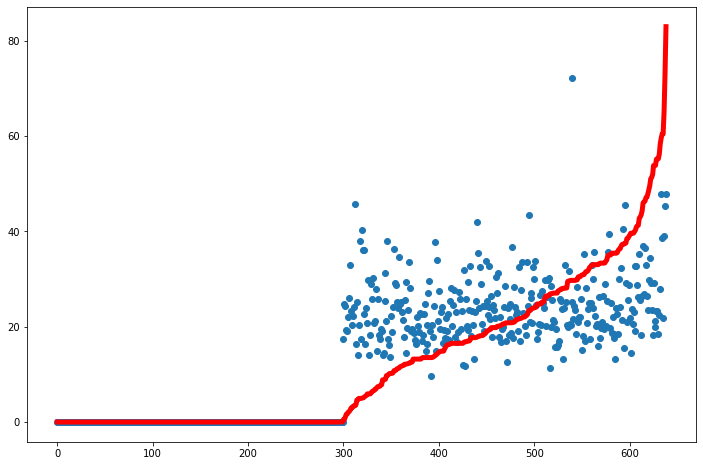

In [31]:
# Generate a residual scatter plot.
resid_df = pd.DataFrame()
resid_df['monetary_value'] = y_test
resid_df['monetary_pred'] = rf_y_pred
resid_df['residuals'] = resid_df['monetary_value'] - resid_df['monetary_pred']
resid_df = resid_df.sort_values('monetary_value')
resid_df['record_num'] = np.arange(len(resid_df))
plt.figure(figsize=(12,8))
plt.plot(resid_df['record_num'],resid_df['monetary_value'],color='red',linewidth=5)
plt.scatter(resid_df['record_num'],resid_df['monetary_pred'])


# Generate a feature importance plot for the best model

In [34]:
# This function generates a feature importance plot on a bar chart.

def feature_importance_plot(model, X_train, n):
    """Plots feature importance. This only works for random forest and XGBoost models."""
    
    plt.figure(figsize=(8, 5))  # Set figure size.
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.title(f'Top {n} Features')
    plt.show()

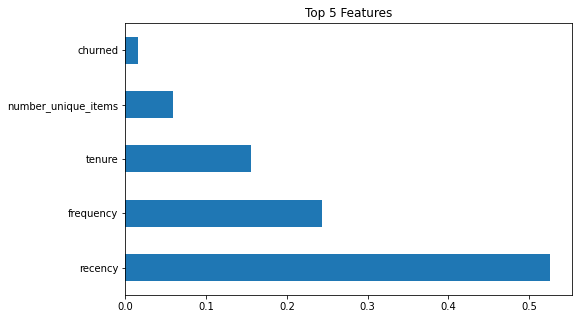

In [37]:
# Plot the feature importances.
feature_importance_plot(rf,X_train,5)


# Plot a learning curve for the best model

In [38]:
# This function generates and plots a learning curve.

def plot_learning_curves(model, X_train, y_train):
    """Plots learning curves for model validation."""
    
    plt.figure(figsize=(5, 5))  # Set figure size.
    train_sizes, train_scores, test_scores = learning_curve(model,
                                                            X_train,
                                                            y_train,
                                                            cv = 5,  # Number of folds in cross-validation.
                                                            scoring = 'neg_mean_squared_error',  # Evaluation metric.
                                                            n_jobs = 1,
                                                            shuffle = True,
                                                            train_sizes = np.linspace(0.01, 1.0, 5))  # 5 different sizes of the training set.

    # Create means and standard deviations of training set scores.
    
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores.
    
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines.
    
    plt.plot(train_sizes, train_mean, '--', color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean, color = '#111111', label = 'Cross-validation score')

    # Create plot.
    
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size'), plt.ylabel('Negative MSE'), plt.legend(loc = 'best')
    plt.tight_layout()
    
    plt.show()

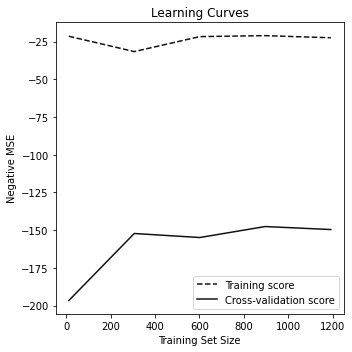

In [39]:
# Call the function to plot learning curves for the best model.
# Keep in mind that this is using negative MSE, so the lower (better) scores are at the top of the y-axis.

plot_learning_curves(rf,X_train,y_train)

# Save the best model

In [40]:
# Save the best model as a pickle file named best_regression_model.pickle.

pickle.dump(rf,open('best_regression_model.pickle','wb'))